In [129]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [130]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [131]:
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [132]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [133]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

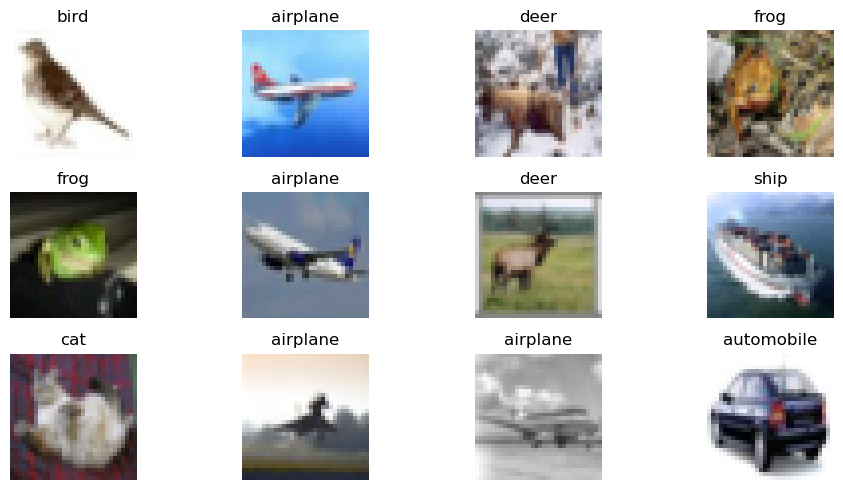

In [134]:
num_samples = 12  
random_indices = np.random.choice(len(X_train), num_samples, replace=False)
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 4, i + 1)  
    plt.imshow(X_train[idx])
    plt.title(class_names[y_train[idx][0]])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [135]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [136]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

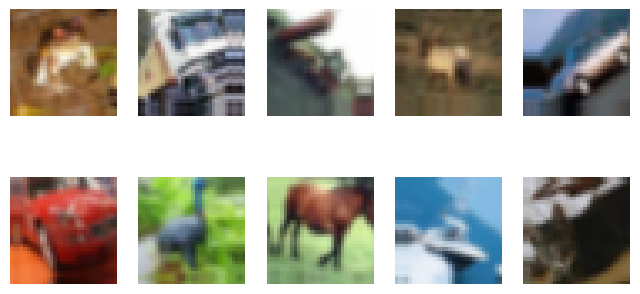

In [137]:
import tensorflow as tf
from tensorflow.keras import layers, models

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  
    layers.RandomRotation(0.1),       
    layers.RandomZoom(0.1),           
    layers.RandomTranslation(0.1, 0.1) 
])

plt.figure(figsize=(8, 4))
for i in range(10):
    augmented_image = data_augmentation(X_train[i])
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_image.numpy())
    plt.axis("off")
plt.show()


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [139]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 10)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 10)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 10)


In [140]:
import tensorflow as tf
from tensorflow.keras import layers, models

#building CNN model
model = models.Sequential([
    # convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

      # convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


In [141]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


In [142]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [143]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    validation_data=(X_valid, y_valid),
                    batch_size=64) 

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.2907 - loss: 2.1085 - val_accuracy: 0.3748 - val_loss: 1.8624
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.4799 - loss: 1.4514 - val_accuracy: 0.5954 - val_loss: 1.1146
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5450 - loss: 1.2713 - val_accuracy: 0.4966 - val_loss: 1.6892
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.5879 - loss: 1.1694 - val_accuracy: 0.5830 - val_loss: 1.1975
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.6206 - loss: 1.0788 - val_accuracy: 0.6792 - val_loss: 0.9086
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.6451 - loss: 1.0120 - val_accuracy: 0.6054 - val_loss: 1.2240
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.6589 - loss: 0.9753 - val_accuracy: 0.6710 - val_loss: 1.0035
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.6824 - loss: 0.9182 - 

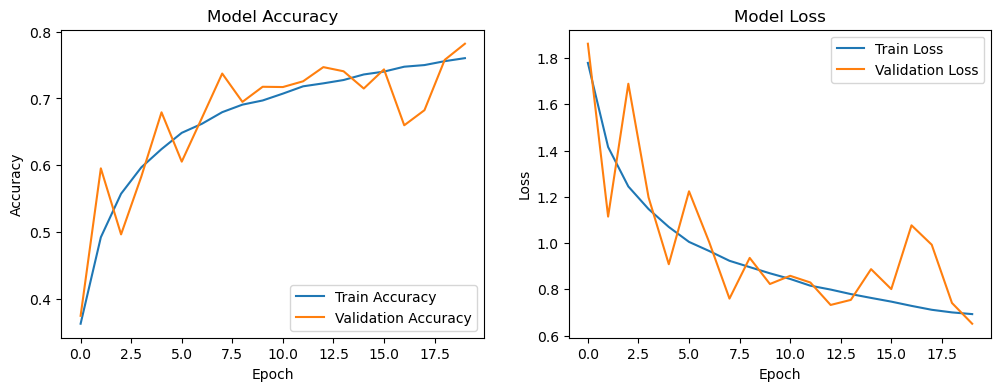

In [144]:
plt.figure(figsize=(12, 4))

# Ploting the Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Ploting the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [186]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7705 - loss: 0.6713
Test Loss: 0.6691
Test Accuracy: 77.28%


In [187]:
random_idx = np.random.randint(len(X_test))
test_image = X_test[random_idx] 
test_label = np.argmax(y_test[random_idx]) 


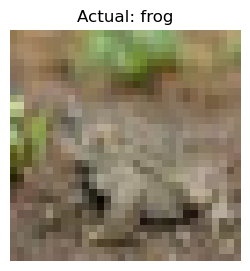

In [188]:
# Displaying the image before prediction
plt.figure(figsize=(3, 3))
plt.imshow(test_image)
plt.axis("off")
plt.title(f"Actual: {class_names[test_label]}")
plt.show()

In [189]:
# Reshaping the image to fit the model input shape 
test_image_input = np.expand_dims(test_image, axis=0)

In [190]:
#Predicting the Random image
predictions = model.predict(test_image_input)
predicted_label = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [191]:
print(f"Predicted Label: {class_names[predicted_label]}")
print(f"Actual Label: {class_names[test_label]}")

Predicted Label: frog
Actual Label: frog
